In [2]:
from sklearn import neighbors
import pandas as pd

In [3]:
#导入数据
Knowledge = pd.read_excel('../从零开始学Python--数据分析与挖掘/第11章 K最近邻模型/Knowledge.xlsx')
#返回欠五行数据
Knowledge.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [4]:
#上述数据已做归一化处理
#STG：目标学科的学习时长
#SCG：重复次数
#STR：相关科目的学习时长
#LPR：相关科目的考试成绩
#PEG：目标科目的考试成绩
#UNS：掌握程度分类：分别为：Very Low,Low,Middle,High

In [7]:
#数据的拆分
from sklearn.model_selection import train_test_split
from sklearn import model_selection

In [9]:
predictors = Knowledge.columns[:-1]
x_train,x_test,y_train,y_test = model_selection.train_test_split(Knowledge[predictors],Knowledge.UNS,test_size=0.25,random_state=1234)

In [10]:
#获取合适的k值
import numpy as np
from sklearn import  neighbors
import matplotlib.pyplot as plt

[1. 2. 3. 4. 5. 6. 7. 8.]


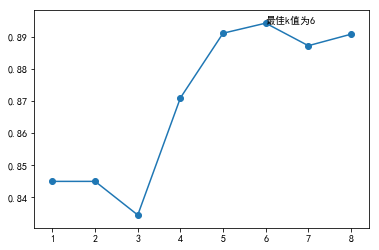

In [15]:
#设置带测试的不同k值
K = np.arange(1,np.ceil(np.log2(Knowledge.shape[0])))
print(K)
#构建空的列表用于存储平均准确率
accuracy = []
for k in K:
    k = int(k)
    #使用10重交叉验证的方法，比对每一个k值下KNN模型的预测准曲率
    cv_result = model_selection.cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=k,weights='distance'),x_train,y_train,cv=10,scoring='accuracy')
    accuracy.append(cv_result.mean())
    
    
#从k个平均准确率中挑选出最大值多对应的下标
arg_max = np.array(accuracy).argmax()

#中文和符号的正常显示
plt.rcParams['font.sans-serif'] = 'SimHei'  #设置中文显示
plt.rcParams['axes.unicode_minus'] = False

#绘制不同k值预测准确率之间的折线图
plt.plot(K,accuracy)
#添加点图
plt.scatter(K,accuracy)
#添加文字说明
plt.text(K[arg_max],accuracy[arg_max],'最佳k值为%s'%int(K[arg_max]))
plt.show()

In [19]:
#得到最佳k值，重新构建模型
knn_class = neighbors.KNeighborsClassifier(n_neighbors=6,weights='distance')
#模型拟合
knn_class.fit(x_train,y_train)
#模型在测试数据集上的预测
predict = knn_class.predict(x_test)
#构建混肴矩阵
cm = pd.crosstab(predict,y_test)
cm

UNS,High,Low,Middle,Very Low
row_0,,,,
High,29,0,0,0
Low,0,34,3,5
Middle,1,0,23,0
Very Low,0,0,0,6


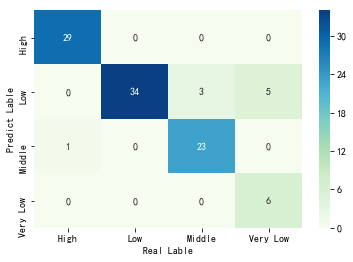

In [21]:
#导入第三方模块
import seaborn as sns
#将混肴矩阵构造成数据框，并加上字段和行名称
cm = pd.DataFrame(cm,columns=['High','Low','Middle','Very Low'],index=['High','Low','Middle','Very Low'])
#绘制热力图
sns.heatmap(cm,annot=True,cmap='GnBu')
#添加x轴和y轴的标签
plt.xlabel('Real Lable')
plt.ylabel('Predict Lable')
#图形显示
plt.show()

In [22]:
from sklearn import  metrics
#模型整体预测准确率
metrics.scorer.accuracy_score(y_test,predict)

0.9108910891089109

In [24]:
print(metrics.classification_report(y_test,predict))

             precision    recall  f1-score   support

       High       1.00      0.97      0.98        30
        Low       0.81      1.00      0.89        34
     Middle       0.96      0.88      0.92        26
   Very Low       1.00      0.55      0.71        11

avg / total       0.93      0.91      0.91       101



## 预测问题的解决

In [25]:
#对于预测问题，将使用CCPP数据作为演示，该数据涉及高炉煤气联合循环发电的几个重要指标，同样来自UCI网站

In [28]:
#读入数据
ccpp = pd.read_excel('../从零开始学Python--数据分析与挖掘/第11章 K最近邻模型/CCPP.xlsx')
ccpp.head()
#AT 高炉的温度
#V  炉内压力
#AP  高炉的相对湿度
#RH  高炉的排气量
#PE  高炉的发电量

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [27]:
ccpp.shape

(9568, 5)

In [35]:
#对数据进行标准化
from sklearn.preprocessing import minmax_scale
#对所有自变量数据标准化处理
predictors = ccpp.columns[:-1]
X = minmax_scale(ccpp[predictors])
predictors

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [37]:
# 将数据集拆分为训练集和测试集
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, ccpp.PE, 
                                                                    test_size = 0.25, random_state = 1234)

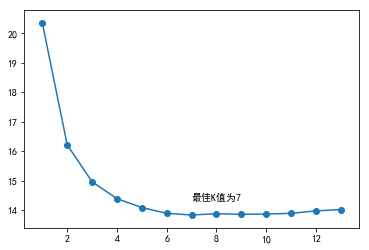

In [38]:
#使用交叉验证法获得最佳k值，此处衡量指标为MSE（均方误差）
#设置带测试的不同k值
K= np.arange(1,np.ceil(np.log2(ccpp.shape[0])))
#构建空列表，用于存储平均MSE
mse = []
for k in K:
    k = int(k)
    cv_result = model_selection.cross_val_score(neighbors.KNeighborsRegressor(n_neighbors=k,weights='distance'),
                                                x_train,y_train,cv=10,scoring='neg_mean_squared_error')
    mse.append((-1 * cv_result).mean())
    
#从k个平均值MSE中选出最小值所对应的下标
arg_min = np.array(mse).argmin()
#绘制不同K值与平均《SE之间的折线图
plt.plot(K,mse)
#添加点图
plt.scatter(K,mse)
#添加文字说明
plt.text(K[arg_min],mse[arg_min] + 0.5,'最佳K值为%s'%int(K[arg_min]))
plt.show()

In [39]:
#k=7，重新建模
knn_reg = neighbors.KNeighborsRegressor(n_neighbors=7,weights='distance')
#模型拟合
knn_reg.fit(x_train,y_train)
#预测
predict = knn_reg.predict(x_test)
#计算MSE值
metrics.mean_squared_error(y_test,predict)

12.814094947334912

In [40]:
pd.DataFrame({'Real':y_test,'Predict':predict},columns=['Real','Predict']).head()

,Real,Predict
2620,435.68,437.677598
6998,442.90,443.101594
2857,449.01,448.758681
6510,449.75,445.560046
5368,455.20,453.010541


In [41]:
#与决策树对比

In [44]:
from sklearn import tree
#预设各参数的不同选项值
max_depth = [19,21,23,25,27]
min_samples_split= [2,4,6,8]
min_samples_leaf = [2,4,8,10,12]
parameters = {
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

grid_dtreg = model_selection.GridSearchCV(estimator=tree.DecisionTreeRegressor(),param_grid=parameters,cv=10)

#模型拟合
grid_dtreg.fit(x_train,y_train)
#返回最佳组合参数值
grid_dtreg.best_params_

{'max_depth': 23, 'min_samples_leaf': 10, 'min_samples_split': 6}

In [48]:
#构建用于回归的决策树
CART_Reg = tree.DecisionTreeRegressor(max_depth=21,min_samples_leaf=10,min_samples_split=6)
#回归拟合
CART_Reg.fit(x_train,y_train)
#预测
pred = CART_Reg.predict(x_test)
#衡量模型
metrics.mean_squared_error(y_test,pred)

16.143720228148158